In [1]:
# Importing the Panda DataFrame libraries

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
np.cos(np.pi/3)

0.5000000000000001

In [3]:
# Loading data into the DataFrame

df_rating = pd.read_csv("RAW_interactions.csv")

In [4]:
# # I want to do the characterisation of the data set: size; number of attributes; has/does not have missing values,number of observations.

# I want to know the number of attributes/ observations in the dataset

df_rating.shape

(1132367, 5)

In [6]:
# view the first five rows to know what the dataset looks like

df_rating.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [5]:
df_rating.sample(10)

,user_id,recipe_id,date,rating,review
17205,280840,41020,2007-04-10,5,This chili was absolutely outstanding! My chil...
270955,157425,255324,2010-12-21,5,Took a cue from one of the other reveiwers and...
533110,192581,281825,2010-01-04,5,Truly excellent mac and cheese. I wanted to p...
464586,535633,199084,2008-12-04,5,I made this for breakfast this am and my Moth...
948792,289308,41541,2008-12-07,4,Tasty! Did not get quite as candied (crunchy ...
756617,147027,167481,2009-07-27,5,I made this to use in recipe 167479 (Recipe St...
306696,2462794,360528,2014-03-12,5,I made this last night and it turned out very ...
890130,486718,177558,2009-10-05,5,Very easy and came out perfectly!! This is the...
806149,679759,292607,2009-01-05,4,This was a good recipe and the meat was very t...
321639,1396309,65911,2011-07-23,5,"Really great! I was skeptical at the spices, b..."


### Data preparation for Recommendation Analysis

In [7]:
# Checking the data types  present in the data dictionary

df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [8]:
# Check for missing values 

df_rating.isnull().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [9]:
# Checking for duplicates

df_rating.duplicated().sum()

0

In [10]:
# We are going to drop review since we do not need it for the recommnendation purposes.

df_rating = df_rating.drop(columns = ['review'])

In [11]:
# checking the new dataset 

df_rating.head()

,user_id,recipe_id,date,rating
0,38094,40893,2003-02-17,4
1,1293707,40893,2011-12-21,5
2,8937,44394,2002-12-01,4
3,126440,85009,2010-02-27,5
4,57222,85009,2011-10-01,5


In [12]:
# I  will convert my date imto timestamp because it is in object. 
# Converting datetime values to timestamps can be beneficial but is not strictly necessary

# Convert the `date` column to datetime
df_rating['date'] = pd.to_datetime(df_rating['date'])

# Convert the datetime column to a timestamp (seconds since epoch)
df_rating['timestamp'] = df_rating['date'].astype('int64') // 10**9

In [13]:
# checking the dataset to view the changes

df_rating.head()

,user_id,recipe_id,date,rating,timestamp
0,38094,40893,2003-02-17,4,1045440000
1,1293707,40893,2011-12-21,5,1324425600
2,8937,44394,2002-12-01,4,1038700800
3,126440,85009,2010-02-27,5,1267228800
4,57222,85009,2011-10-01,5,1317427200


In [14]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  int64         
 1   recipe_id  1132367 non-null  int64         
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   timestamp  1132367 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 43.2 MB


In [15]:
# Drop the `date` column because we will continue with our timestamp for the recommendation system
df_rating.drop(columns=['date'], inplace=True)

In [16]:
# now lets check our dataset to know it is ready for recommendation.
# we will check for null again and info with the shape

df_rating.isnull().sum()

user_id      0
recipe_id    0
rating       0
timestamp    0
dtype: int64

In [17]:
# checking the dataset to view the changes

df_rating.head()

,user_id,recipe_id,rating,timestamp
0,38094,40893,4,1045440000
1,1293707,40893,5,1324425600
2,8937,44394,4,1038700800
3,126440,85009,5,1267228800
4,57222,85009,5,1317427200


In [18]:
df_rating.shape

(1132367, 4)

In [20]:
mean_rating = df_rating.groupby(by="user_id", as_index=False)["rating"].mean()

mean_rating

,user_id,rating
0,1533,4.710938
1,1535,4.473552
2,1581,5.000000
3,1634,3.616667
4,1676,4.677419
...,...,...
226565,2002371755,5.000000
226566,2002371792,4.000000
226567,2002371843,5.000000
226568,2002372464,4.000000


In [35]:
df_rate = pd.merge(df_rating, mean_rating, on="user_id", suffixes=(None, "_mean"))

df_rate.head()

,user_id,recipe_id,rating,timestamp,rating_mean
0,38094,40893,4,1045440000,4.828571
1,38094,16954,5,1023667200,4.828571
2,38094,40753,5,1070841600,4.828571
3,38094,34513,5,1026950400,4.828571
4,38094,69545,5,1062374400,4.828571


In [36]:
df_rate["rating_diff"] = df_rate["rating"] - df_rate["rating_mean"]

In [37]:
df_rate2 = df_rate.iloc[:df_rate.shape[0]//10]

In [38]:
df_rate2.shape[0]**2

12822391696

In [39]:
pivot_df = pd.pivot_table(df_rate2, values="rating_diff", index="user_id", columns="recipe_id")

In [40]:
pivot_df.head()

recipe_id,40,49,52,58,66,70,91,93,114,119,...,536382,536384,536678,536726,536734,537071,537073,537241,537458,537459
user_id,,,,,,,,,,,,,,,,,,,,,
4470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5060,NaN,NaN,NaN,0.313613,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
recipe_df = pivot_df.fillna(pivot_df.mean(axis=0))

KeyboardInterrupt: 

In [ ]:
user_df = pivot_df.apply(lambda row: row.fillna(row.mean()), axis=1)

In [79]:
# pip install pmdarima

In [106]:
# loading libraries for Data visualization and Time series

# Importing the Panda DataFrame libraries

import warnings
warnings.filterwarnings('ignore')
import os, sys
import numpy as np
from scipy.stats import zscore 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns
from scipy import stats
sns.set()

In [44]:
# Loading data into the DataFrame and view the first five rows to know what the dataset looks like

df_sales = pd.read_csv("train.csv")

In [45]:
# view the first five rows to know what the dataset looks like

df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Descriptive Statistics 
* Checking to see some first observations through the statistical description

In [52]:
# # I want to do the characterisation of the data set: size; number of attributes; has/does not have missing values,number of observations.

# I want to know the number of attributes/ observations in the dataset

df_sales.shape

(9800, 18)

In [47]:
# Checking the data type of the attributes present in the dataset

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [48]:
df_sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [49]:
# Check for missing values 

df_sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [50]:
# Checking for duplicates

df_sales.duplicated().sum()

0

### Some of the first Observations are as follows;
* There are 9800 observations and 18 variables
* There are 15 object type variables and 3 others are all numerical Variables
* There are some missing values and outliers in sales, these will be explore more during out Data Processing stage.
* We do not need to scale the missing values as we can see, it is not up to 10% of the whole dataset. Deleting that won't have any effect on our analysis.

### Data preparation / preprocessing

In [53]:
# Scaling the Postal Code variable to see percentage of missing values.

#calculting isnull() % for 'Income'
df_sales[df_sales['Postal Code'].isnull()].shape[0]* 100 / len(df_sales)

0.11224489795918367

* The percentage of the missing data is relatively small at 0.1% 
* It is safe to drop the missing values as it won't have any negative effect on our dataset.

In [55]:
# Drop rows where the 'postcode' column has missing values
df_sales= df_sales.dropna(subset=['Postal Code'])

# Check for missing values 

df_sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

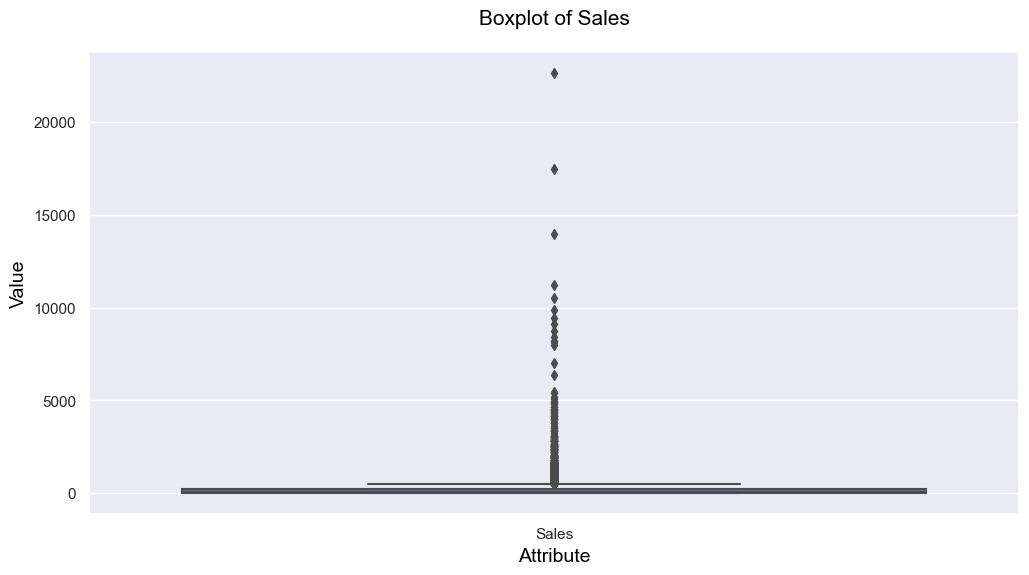

In [58]:
# Now we will treat the outlier in sales but I will like to view the outlier first.

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sales[['Sales']])
plt.title('Boxplot of Sales', pad=20, fontsize=15, color='black')
plt.xlabel('Attribute', fontsize=14, color="black")
plt.ylabel('Value', fontsize=14, color="black")
plt.show()

In [61]:
# Removing outliers using Z-score
z_scores = zscore(df_sales[['Sales']])
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
df_sales = df_sales[~outliers]

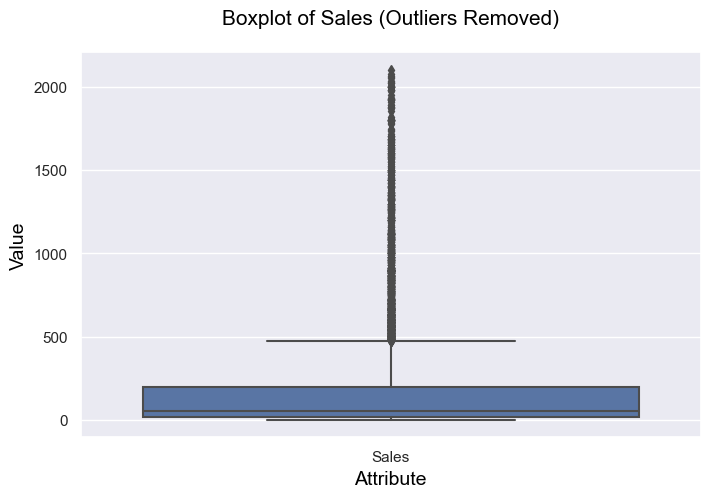

In [64]:
# Visualize outliers removed using box plots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_sales[['Sales']])
plt.title('Boxplot of Sales (Outliers Removed)', pad=20, fontsize=15, color='black')
plt.xlabel('Attribute', fontsize=14, color="black")
plt.ylabel('Value', fontsize=14, color="black")
plt.show()

In [65]:
# Rectify outliers by capping
# Capping outliers in 'Sales'
sales_cap = df_sales['Sales'].quantile(0.95)
df_sales.loc[df_sales['Sales'] > sales_cap, 'Income'] = sales_cap

## Exploratory Analysis
* I want to explore the data through visualization to uncover patterns, spot anomalies, and test hypotheses with summary statistics and graphical representations.

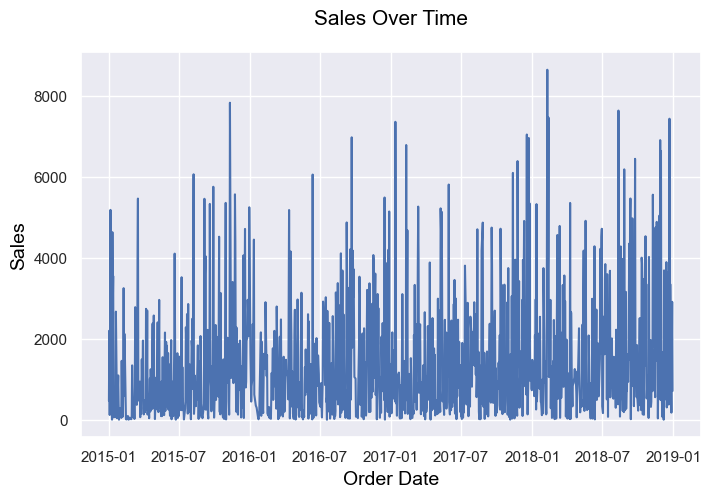

In [69]:
# Want to Visualize Sales over time

df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
sales_data = df_sales.groupby('Order Date')['Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(8, 5))
plt.plot(sales_data['Order Date'], sales_data['Sales'])
plt.title('Sales Over Time', pad=20, fontsize=15, color='black')
plt.xlabel('Order Date', fontsize=14, color='black')
plt.ylabel('Sales', fontsize=14, color='black')
plt.show()

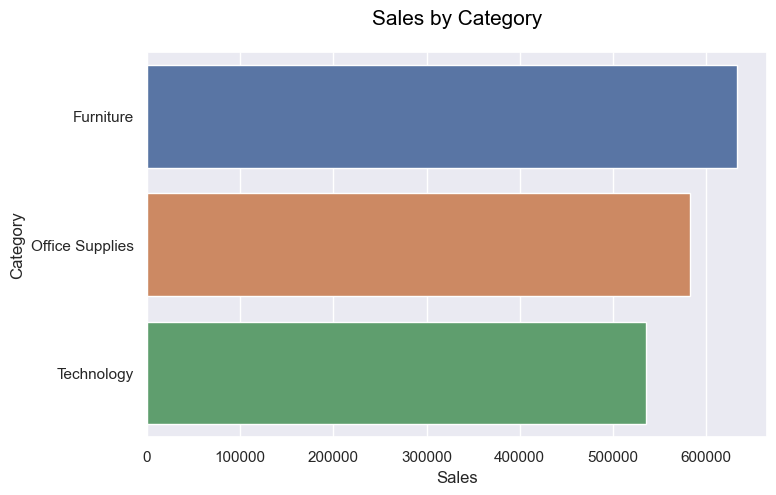

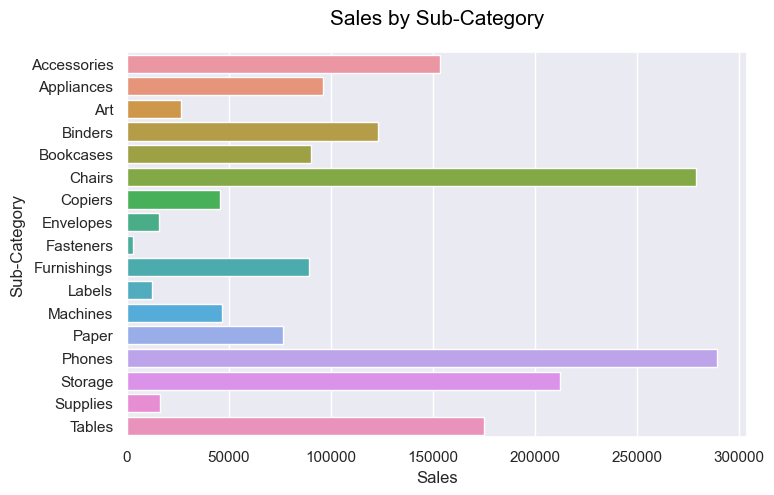

In [70]:
# Sales Distribution by Category and Sub-Category

category_sales = df_sales.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Category', data=category_sales)
plt.title('Sales by Category', pad=20, fontsize=15, color='black')
plt.show()

# Sales by sub-category
subcategory_sales = df_sales.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Sub-Category', data=subcategory_sales)
plt.title('Sales by Sub-Category', pad=20, fontsize=15, color='black')
plt.show()


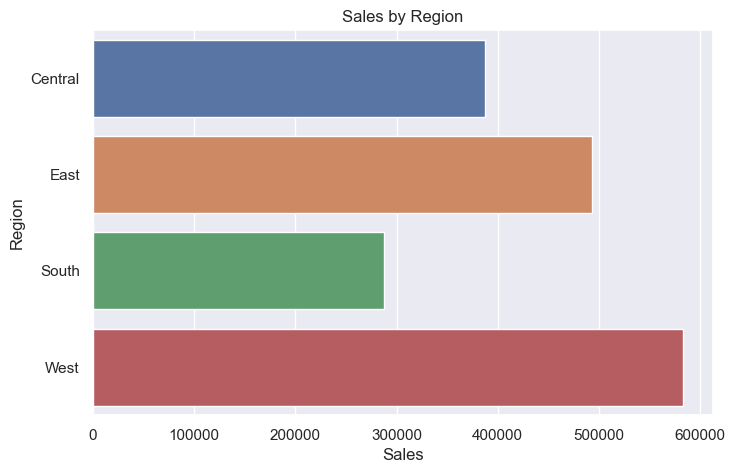

In [71]:
# Sales by Region

region_sales = df_sales.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Region', data=region_sales)
plt.title('Sales by Region')
plt.show()

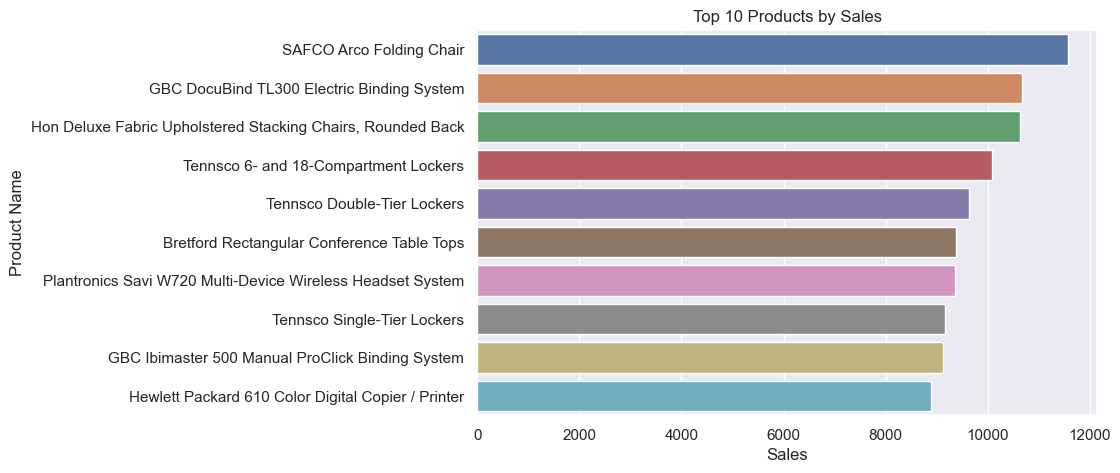

In [72]:
# Top 10 products by sales

top_products = df_sales.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Product Name', data=top_products)
plt.title('Top 10 Products by Sales')
plt.show()

# Time Series Analysis Preparation

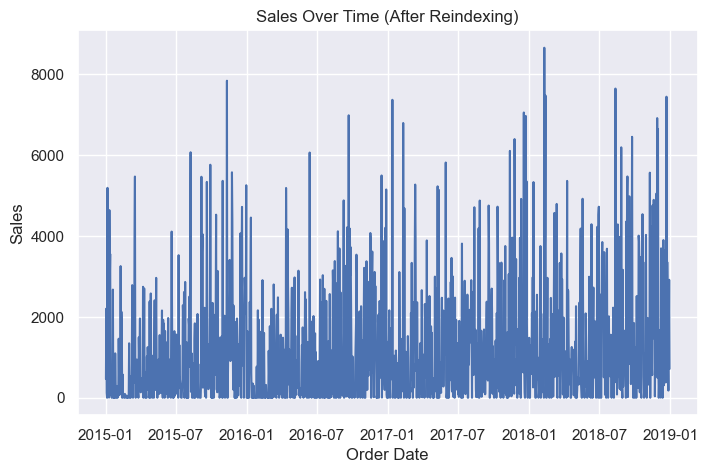

In [76]:
# Check for missing dates

all_dates = pd.date_range(start=sales_data['Order Date'].min(), end=sales_data['Order Date'].max())
sales_data.set_index('Order Date', inplace=True)
sales_data = sales_data.reindex(all_dates, fill_value=0).rename_axis('Order Date').reset_index()

# Re-plot to confirm
plt.figure(figsize=(8, 5))
plt.plot(sales_data['Order Date'], sales_data['Sales'])
plt.title('Sales Over Time (After Reindexing)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


In [89]:
df_sales["Order Date"] = df_sales["Order Date"].astype("datetime64[ns]")

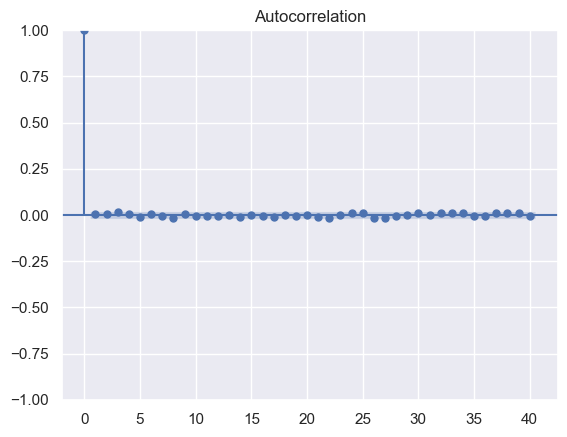

In [90]:
plot_acf(df_sales["Sales"])
plt.show()

* Lag 1 in ACF: Suggests the presence of an MA(1) term

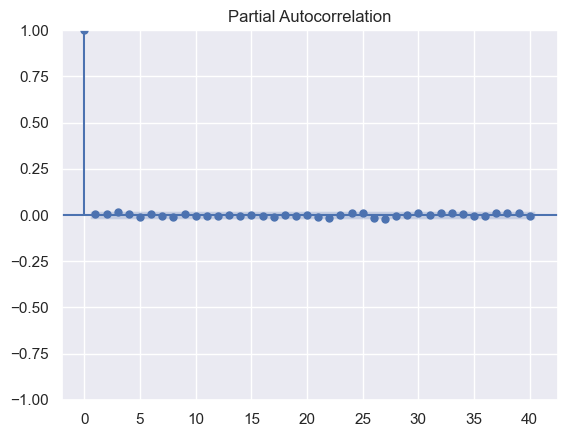

In [91]:
plot_pacf(df_sales["Sales"])
plt.show()

* Lag 1 in PACF: Suggests the presence of an AR(1) term

** Both AR and MA is 1, This is common in time series data where the series exhibits both immediate past value dependency and short-term shock effects.

In [92]:
arma_model = SARIMAX(df_sales["Sales"], order=(1,0, 1)).fit()

In [94]:
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 9667
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -69033.785
Date:                Fri, 24 May 2024   AIC                         138073.571
Time:                        03:21:18   BIC                         138095.100
Sample:                             0   HQIC                        138080.870
                               - 9667                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.71e-06   2.12e+05      0.000       1.000       1.000
ma.L1         -0.9993      0.001  -1687.618      0.000      -1.000      -0.998
sigma2      9.329e+04   2.81e-10   3.32e+14      0.000    9.33e+04    9.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             55013.29
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             2.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+28. Standard errors may be unstable.
"""

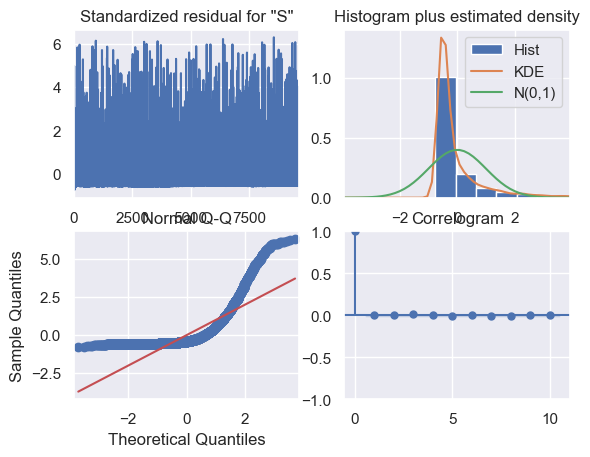

In [96]:
arma_model.plot_diagnostics()
plt.show()

In [98]:
forecast = arma_model.get_forecast(steps=10)

In [100]:
df_sales.iloc[-100]

Row ID                                                        9699
Order ID                                            CA-2018-154116
Order Date                                     2018-12-15 00:00:00
Ship Date                                               19/12/2018
Ship Mode                                           Standard Class
Customer ID                                               KM-16660
Customer Name                                         Khloe Miller
Segment                                                   Consumer
Country                                              United States
City                                                     Inglewood
State                                                   California
Postal Code                                                90301.0
Region                                                        West
Product ID                                         OFF-PA-10004569
Category                                           Office Supp

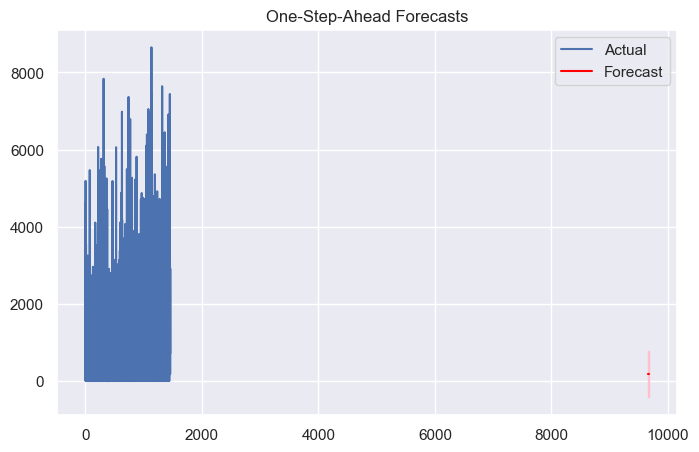

Forecast Errors: 1449   NaN
1450   NaN
1451   NaN
1452   NaN
1453   NaN
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
9667   NaN
9668   NaN
9669   NaN
9670   NaN
9671   NaN
9672   NaN
9673   NaN
9674   NaN
9675   NaN
9676   NaN
dtype: float64


In [103]:
# Forecast the next 10 steps
forecast = arma_model.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(8, 5))
plt.plot(sales_data.index, sales_data['Sales'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title('One-Step-Ahead Forecasts')
plt.legend()
plt.show()

# Calculate forecast errors
actual = sales_data['Sales'][-10:]
forecast_errors = actual - forecast_mean
print('Forecast Errors:', forecast_errors)


In [104]:
print(sales_data['Sales'][-10:])
print(sales_data['Sales'][-10:].isna().sum())

1449    2140.9400
1450    7442.0210
1451    1926.7760
1452    3353.1020
1453    2698.9270
1454     814.5940
1455     177.6360
1456    1657.3508
1457    2915.5340
1458     713.7900
Name: Sales, dtype: float64
0


In [110]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales.set_index('Order Date', inplace=True)

# Fit ARMA(1,1) model
arma_model = ARIMA(sales_data['Sales'], order=(1, 0, 1))
arma_result = arma_model.fit()
print(arma_result.summary())

# Forecast the next 10 steps
forecast = arma_result.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Extract the actual sales data for the forecast period
actual = sales_data['Sales'][-10:]

# Print the indices for debugging
print("Actual data indices:", actual.index)
print("Forecasted data indices:", forecast_mean.index)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1459
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -12631.088
Date:                Fri, 24 May 2024   AIC                          25270.177
Time:                        03:37:20   BIC                          25291.319
Sample:                    01-02-2015   HQIC                         25278.064
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1202.0225    234.292      5.130      0.000     742.819    1661.226
ar.L1          0.9944      0.005    188.876      0.000       0.984       1.005
ma.L1         -0.9719      0.010    -94.476      0.0